# Subproject 1 – Used Car Prices Prediction
Machine Learning – M.Sc. in Electrical and Computer Engineering


Importing libraries

In [47]:
import pandas as pd

In [48]:
import numpy as np
import matplotlib.pyplot as plt


Reading files using pandas library

In [49]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_sample_submission = pd.read_csv("sample_submission.csv")


# Exploratory Data Analysis (EDA)

using the shape() method, will give the dimension of the data i am working with.

In [50]:
# for train data

df_train.shape

(188533, 13)

In [51]:
# for test data

df_test.shape

(125690, 12)

the head() method will show first rows of data but limited, "n" can be passed as an argument, if we want specific amount to row to be shown.
passing n as an argument here will show the first n rows from index (0 to n-1).

In [52]:
# for train data

df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [53]:
# for test data

df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


Using info() method to see the summary details about the dataframes like the index, datatypes, columns, non-null values and the memory usage.

In [54]:
#  for the train data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [55]:
#  for the test data

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


checking the data types of the data we are dealing with

In [56]:
# for train data

df_train.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [57]:
# for test data

df_test.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
dtype: object

the describitution of the dataset

In [58]:
df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [59]:
df_test.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


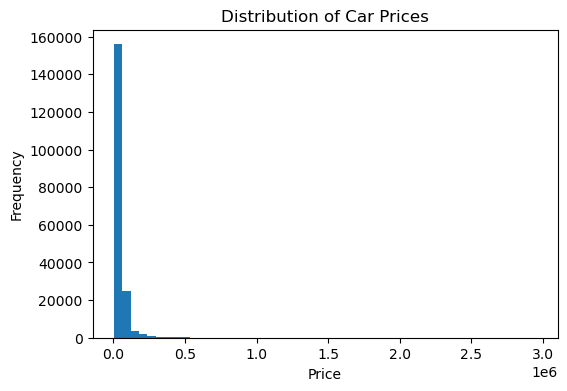

In [60]:
# from the distribution plot below, we can say that the the target ['price'] of the train data is skewed with fewer high-priced car.

# The target distribution was analyzed to identify skewness and outliers in used car prices, which directly affects model choice and potential target transformations.

# price distrubution  visualization
plt.figure(figsize=(6,4))
plt.hist(df_train["price"], bins=50)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

separating numerical column and categorical column

In [61]:
#  for train data

numerical_columns = df_train.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df_test.select_dtypes(include=["object", "bool", "category"]).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


Numerical columns: Index(['id', 'model_year', 'milage', 'price'], dtype='object')
Categorical columns: Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')


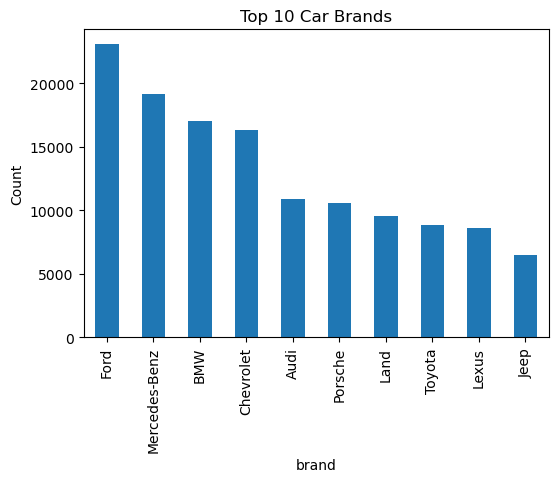

In [62]:
#this plot will show the 'brand' category showing that a small number of dataset dominate compare to other brands

# this was conducted to identify dominant and rare brands, guiding the choice of encoding strategies and dimensionality control. wecan also change the column to other categorical columns too for better encoding strategies.

plt.figure(figsize=(6,4))
df_train["brand"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Car Brands")
plt.ylabel("Count")
plt.show()




<Figure size 600x400 with 0 Axes>

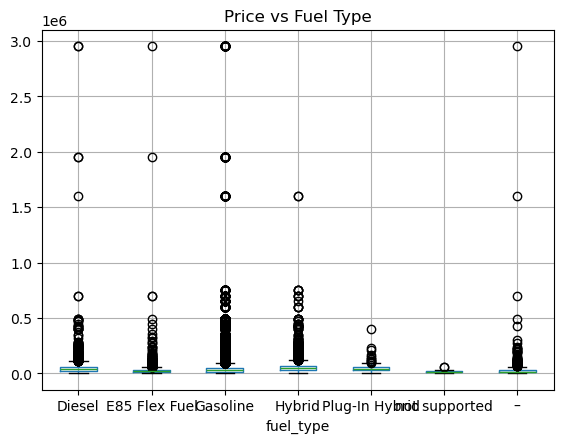

In [63]:
# The relationship between price and fuel type was analyzed to verify its influence on vehicle value and justify categorical encoding.

plt.figure(figsize=(6,4))
df_train.boxplot(column="price", by="fuel_type")
plt.title("Price vs Fuel Type")
plt.suptitle("")  # removes automatic subtitle
plt.show()

Missing values

the pandas library provides isnull() to check the column with missing values, sum() will give the total sum of the missing values if any exist,  and the sort_values for sorting.

In [64]:
#  for train data

train_missing_values =df_train.isnull().sum().sort_values(ascending=False)
train_missing_columns = df_train.columns[df_train.isna().any()].tolist()
train_missing_columns

['fuel_type', 'accident', 'clean_title']

In [65]:
#for test data

df_test.isnull().sum().sort_values(ascending=False)

clean_title     14239
fuel_type        3383
accident         1632
id                  0
model_year          0
model               0
brand               0
milage              0
transmission        0
engine              0
int_col             0
ext_col             0
dtype: int64

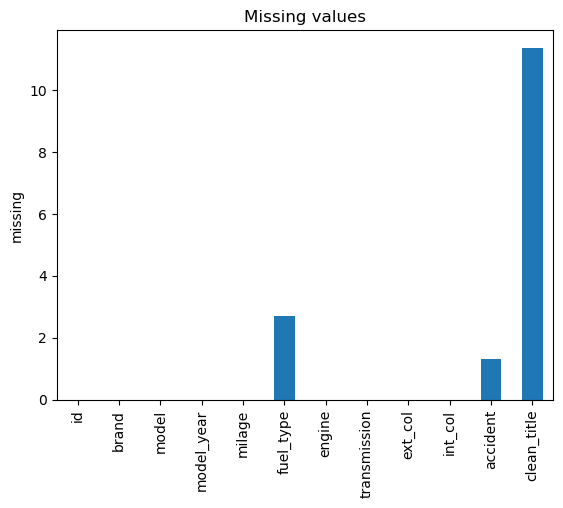

In [66]:
# from pandas dataframe, we can use the .mean() method to find the mean for the each colums with missing values, then convert it to percentage multiplying be 100.

#  Missing value analysis was performed to quantify data incompleteness and justify the imputation strategies applied during preprocessing.

train_missing_percentage = df_train.isnull().mean().sort_values(ascending=False) * 100
train_missing_percentage[train_missing_percentage > 0]

# the plot for columns with missing data
(df_train.drop(['price'], axis=1).isnull().mean() * 100).plot(kind="bar")
plt.title("Missing values")
plt.ylabel("missing")
plt.show()


# Data preprocessing

## Filling missing data

From using info() method when doing EDA above on the train data, we can see that there are some missing values. Like in the fuel_type, accident and the clean_title features.
This missing values are categorical features, therefore there is need to fill the the missing values before training.

In [ ]:
# replacing the missing values in the training set with its modes using the mode() function to get the mode and using fillna() function to fill the positions with misiing data. The 2 method are from pandas library 

for column in train_missing_columns:
    mode_value = df_train[column].mode()[0]
    df_train[column] = df_train[column].fillna(mode_value)

# For the test set, i am only fill missing values for columns that are present in the train data set and excluding 'price'.
# DOing this bring cosistency and more accuracy when training the train data. As we are dealing with unseeb data, we can't be sure if the unseen data will have additional column or not, or if they will contain some missing data, so it is best to take care of that. 
 
 
missing_columns_test = [col for col in train_missing_columns if col in df_test.columns]

for column in missing_columns_test:
    # Use the mode calculated from the training set for consistency
    mode_value = df_train[column].mode()[0]
    df_test[column] = df_test[column].fillna(mode_value)


In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     188533 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      188533 non-null  object
 11  clean_title   188533 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     125690 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      125690 non-null  object
 11  clean_title   125690 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB
